In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import keras as ks
#from keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.0.0


In [65]:
#Import MNIST Datasets
mnist = keras.datasets.mnist
#Load Datasets
(train_images, train_labels), (test_images, test_labels) = ks.datasets.mnist.load_data()
#Class names for options
class_names = ['0', '1', '2', '3', '4','5', '6', 'seven', '8', '9']
#Show W
train_images.shape
len(train_labels)

60000

In [ ]:
#Validate Content on MNIST

In [61]:
len(train_labels)

60000

In [60]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [63]:
test_images.shape
len(test_labels)



10000

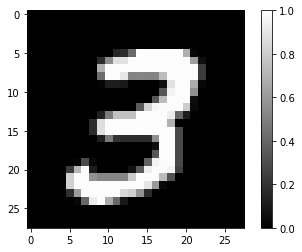

In [58]:
plt.figure()
plt.imshow(train_images[7], cmap = "gray")
plt.colorbar()
plt.grid(False)
plt.show()


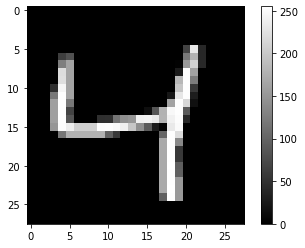

In [45]:
plt.figure()
plt.imshow(train_images[2], cmap = "gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
#Scale these values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0


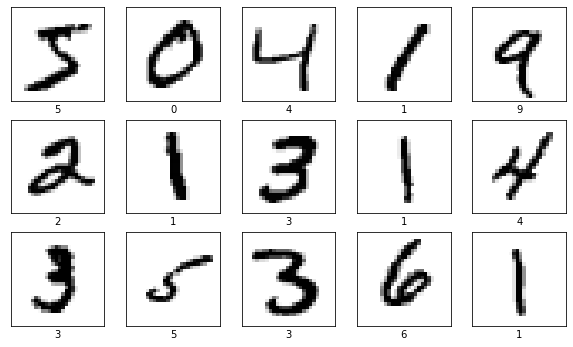

In [62]:
#Display DataSet
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [48]:
#Layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [49]:
#Compiler
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [51]:
#Train Model
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0136 - accuracy: 0.9958
Epoch 2/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0112 - accuracy: 0.9966
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0107 - accuracy: 0.9966
Epoch 4/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0076 - accuracy: 0.9979
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0090 - accuracy: 0.9971
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0080 - accuracy: 0.9973
Epoch 7/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0052 - accuracy: 0.9986
Epoch 8/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0068 - accuracy: 0.9977
Epoch 9/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0051 - accuracy: 0.9985
Epoch

In [52]:
#Test Model Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


10000/1 - 1s - loss: 0.0546 - accuracy: 0.9777

Test accuracy: 0.9777


In [54]:
#Predections
predictions = model.predict(test_images)
predictions[0]

array([9.1841654e-09, 4.8771442e-16, 2.7363758e-10, 7.4638686e-09,
       6.9038136e-18, 5.7802276e-17, 1.2155393e-20, 1.0000000e+00,
       8.2516811e-14, 3.4472694e-09], dtype=float32)

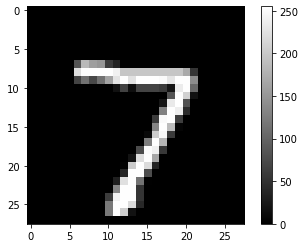

In [89]:
#Display Image for Predection
plt.figure()
plt.imshow(test_images[0], cmap = "gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [90]:
#Predection
np.argmax(predictions[0])

7

In [80]:
#Save Model
model.save("model.h5")